### BFS and DFS

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class Graph:
    def __init__(self, graph_dict=None):
        if graph_dict is None:
            graph_dict = {}
        self.graph_dict = graph_dict

    def add_edge(self, vertex, edge):
        self.graph_dict[vertex].append(edge)

    def bfs(self, start):
        visited = set()
        queue = deque([start])
        visited.add(start)

        while queue:
            vertex = queue.popleft()
            print(vertex)  # Print the node as it's visited

            for neighbor in self.graph_dict[vertex]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

    def dfs(self, start, visited=None):
        if visited is None:
            visited = set()
        visited.add(start)
        print(start)  # Print the node as it's visited

        for neighbor in self.graph_dict[start]:
            if neighbor not in visited:
                self.dfs(neighbor, visited)

    def visualize_graph(self):
        G = nx.Graph()
        for node in self.graph_dict:
            G.add_nodes_from(self.graph_dict[node])
            for neighbor in self.graph_dict[node]:
                G.add_edge(node, neighbor)
        
        nx.draw(G, with_labels=True, font_weight='bold')
        plt.show()

if __name__ == "__main__":
    graph_dict = {
        'A': ['B', 'C'],
        'B': ['A', 'D', 'E'],
        'C': ['A', 'F'],
        'D': ['B'],
        'E': ['B', 'F'],
        'F': ['C', 'E']
    }

    graph = Graph(graph_dict)

    print("Graph Visualization:")
    graph.visualize_graph()

    print("\nBFS Traversal:")
    graph.bfs('A')

    print("\nDFS Traversal:")
    graph.dfs('A')

### A* Algorithm

Graph Visualization:


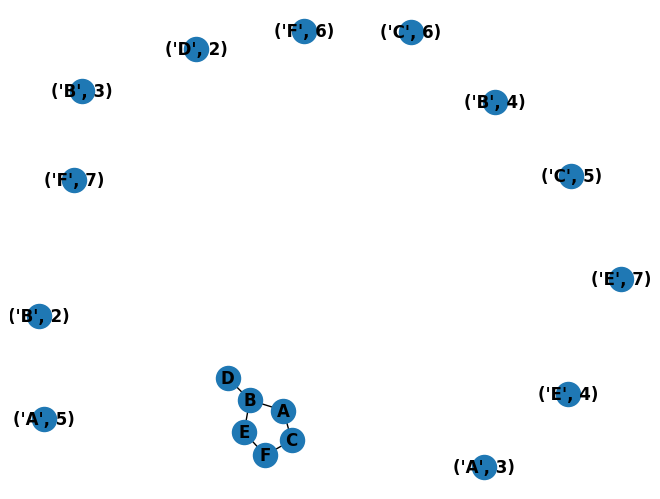


A* Search Traversal:
A
C
F
Goal reached!


In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

class Graph:
    def __init__(self, graph_dict=None):
        if graph_dict is None:
            graph_dict = {}
        self.graph_dict = graph_dict

    def add_edge(self, vertex, edge, cost=0):
        self.graph_dict[vertex].append((edge, cost))

    def astar(self, start, goal, heuristic):
        visited = set()
        priority_queue = PriorityQueue()
        priority_queue.put((0, start))
        visited.add(start)

        while not priority_queue.empty():
            _, current_vertex = priority_queue.get()
            print(current_vertex)  # Print the node as it's visited

            if current_vertex == goal:
                print("Goal reached!")
                return True

            for neighbor, _ in self.graph_dict[current_vertex]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    priority_queue.put((heuristic[neighbor], neighbor))

        print("Goal not found!")
        return False

    def visualize_graph(self):
        G = nx.Graph()
        for node in self.graph_dict:
            G.add_nodes_from(self.graph_dict[node])
            for neighbor, _ in self.graph_dict[node]:
                G.add_edge(node, neighbor)
        
        nx.draw(G, with_labels=True, font_weight='bold')
        plt.show()

if __name__ == "__main__":
    graph_dict = {
        'A': [('B', 3), ('C', 5)],
        'B': [('A', 3), ('D', 2), ('E', 4)],
        'C': [('A', 5), ('F', 6)],
        'D': [('B', 2)],
        'E': [('B', 4), ('F', 7)],
        'F': [('C', 6), ('E', 7)]
    }

    graph = Graph(graph_dict)

    print("Graph Visualization:")
    graph.visualize_graph()

    print("\nA* Search Traversal:")
    heuristic = {'A': 5, 'B': 4, 'C': 2, 'D': 2, 'E': 3, 'F': 0}  # Example heuristic values
    graph.astar('A', 'F', heuristic)


### Best First Search



Best-First Search Traversal:
A
B
D
E
C
F
Goal reached!

Graph Visualization:


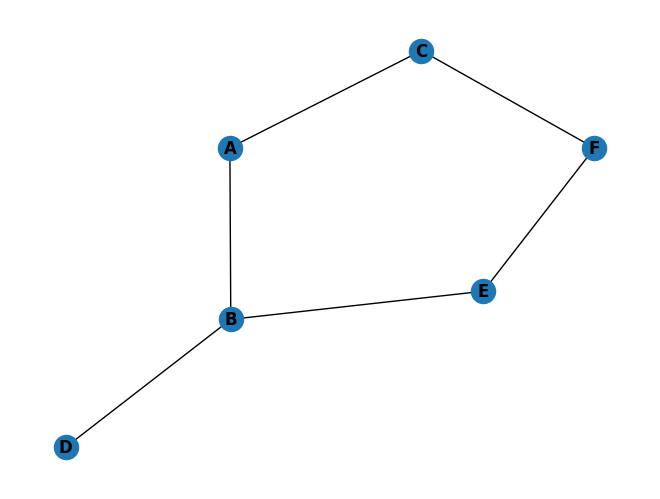

In [7]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v, weight):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))

    def best_first_search(self, start, goal):
        visited = set()
        priority_queue = [(0, start)]
        
        while priority_queue:
            _, current_vertex = heapq.heappop(priority_queue)
            print(current_vertex)  # Print the node as it's visited
            
            if current_vertex == goal:
                print("Goal reached!")
                return True
            
            visited.add(current_vertex)
            
            for neighbor, weight in self.graph[current_vertex]:
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (weight, neighbor))
                    # Note: In this implementation, we use the weight as the priority
                    
        print("Goal not found!")
        return False

    def visualize_graph(self, G):
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold')
        plt.show()

if __name__ == "__main__":
    graph = Graph()
    graph.add_edge('A', 'B', 3)
    graph.add_edge('A', 'C', 5)
    graph.add_edge('B', 'D', 2)
    graph.add_edge('B', 'E', 4)
    graph.add_edge('C', 'F', 6)
    graph.add_edge('E', 'F', 7)

    print("\nBest-First Search Traversal:")
    graph.best_first_search('A', 'F')

    print("\nGraph Visualization:")
    G = nx.Graph()
    for node, neighbors in graph.graph.items():
        for neighbor, _ in neighbors:
            G.add_edge(node, neighbor)
    graph.visualize_graph(G)


### 8 Puzzle    

In [8]:
from collections import deque

# Function to print the puzzle state
def print_puzzle(state):
    for row in state:
        print(" ".join(map(str, row)))

# Function to find the coordinates of the zero (empty) tile and the new position after a move
def find_tile_positions(state, move):
    zero_row, zero_col = next((i, row.index(0)) for i, row in enumerate(state) if 0 in row)
    new_row, new_col = move
    return (zero_row, zero_col), (new_row, new_col)

# Function to find the possible moves
def possible_moves(state):
    moves = []
    zero_row, zero_col = next((i, row.index(0)) for i, row in enumerate(state) if 0 in row)
    if zero_row > 0:
        moves.append((zero_row - 1, zero_col))  # Move up
    if zero_row < 2:
        moves.append((zero_row + 1, zero_col))  # Move down
    if zero_col > 0:
        moves.append((zero_row, zero_col - 1))  # Move left
    if zero_col < 2:
        moves.append((zero_row, zero_col + 1))  # Move right
    return moves

# Function to apply a move to the state
def apply_move(state, move):
    new_state = [row[:] for row in state]
    (zero_row, zero_col), (new_row, new_col) = find_tile_positions(state, move)
    new_state[zero_row][zero_col], new_state[new_row][new_col] = new_state[new_row][new_col], new_state[zero_row][zero_col]
    return new_state

# Function to check if the puzzle is solved
def is_solved(state):
    return state == [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
        ]

# Function to solve the puzzle using BFS
def solve_puzzle(initial_state):
    visited = set()
    queue = deque([(initial_state, [])])

    while queue:
        state, path = queue.popleft()
        if is_solved(state):
            print("Solution found in {} moves:".format(len(path)))
            print_puzzle(state)
            return

        if tuple(map(tuple, state)) not in visited:
            visited.add(tuple(map(tuple, state)))
            for move in possible_moves(state):
                new_state = apply_move(state, move)
                new_path = path + [move]
                queue.append((new_state, new_path))

    print("No solution found.")

# Initial puzzle configuration
initial_state = [
    [1, 2, 3],
    [0, 4, 5],
    [7, 8, 6]
]

# Solve the puzzle
solve_puzzle(initial_state)


Solution found in 3 moves:
1 2 3
4 5 6
7 8 0


### Astar    

In [9]:
import heapq

# Define the size of the grid
ROW = 9
COL = 10

# Define directions (up, down, left, right, diagonal)
directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]

# Check if a cell is valid (within the grid)
def is_valid(row, col):
    return 0 <= row < ROW and 0 <= col < COL

# Implement the A* search algorithm
def a_star_search(grid, src, dest):
    open_list = [(0, src)]
    heapq.heapify(open_list)
    closed_list = set()
    parent = {}

    while open_list:
        f, current = heapq.heappop(open_list)
        if current == dest:
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(src)
            path.reverse()
            return path
        closed_list.add(current)

        for direction in directions:
            new_row, new_col = current[0] + direction[0], current[1] + direction[1]
            if is_valid(new_row, new_col) and grid[new_row][new_col] and (new_row, new_col) not in closed_list:
                g = f + 1  # Cost from start to this cell (assuming uniform cost)
                h = abs(dest[0] - new_row) + abs(dest[1] - new_col)  # Manhattan distance heuristic
                f_new = g + h
                heapq.heappush(open_list, (f_new, (new_row, new_col)))
                parent[(new_row, new_col)] = current

    return None  # No path found

def main():
    # Define the grid (1 for unblocked, 0 for blocked)
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    ]

    # Define the source and destination
    src = (8, 0)
    dest = (0, 0)

    # Run the A* search algorithm
    path = a_star_search(grid, src, dest)
    if path:
        print("Path found:")
        for row, col in path:
            print(f"({row}, {col}) ->", end=" ")
    else:
        print("No path found")

if __name__ == "__main__":
    main()


Path found:
(8, 0) -> (7, 0) -> (6, 0) -> (5, 0) -> (4, 0) -> (4, 1) -> (3, 2) -> (2, 1) -> (1, 0) -> (0, 0) -> 

### Family Tree

In [28]:
class Person:
    def __init__(self, name, gender):
        self.name = name
        self.gender = gender
        self.children = []

    def add_child(self, child):
        self.children.append(child)

    def __repr__(self):
        return f"{self.name} ({self.gender})"


def print_family_tree(person, level=0):
    print("  " * level + str(person))
    for child in person.children:
        print_family_tree(child, level + 1)


if __name__ == "__main__":
    # Define family members
    grandma = Person("Grandma", "Female")
    grandpa = Person("Grandpa", "Male")
    mom = Person("Mom", "Female")
    dad = Person("Dad", "Male")
    child1 = Person("Child 1", "Male")
    child2 = Person("Child 2", "Female")

    # Build family tree
    grandma.add_child(mom)
    grandpa.add_child(mom)
    mom.add_child(child1)
    mom.add_child(child2)
    dad.add_child(child1)
    dad.add_child(child2)

    # Print family tree
    print("Family Tree:")
    print_family_tree(grandma)


Family Tree:
Grandma (Female)
  Mom (Female)
    Child 1 (Male)
    Child 2 (Female)


### Tower of Hanoi problem. (Three disc source- intermediatory and destination.rods)

In [29]:
def tower_of_hanoi(n, source, destination, auxiliary):
    if n == 1:
        print(f"Move disk 1 from rod {source} to rod {destination}")
        return
    tower_of_hanoi(n-1, source, auxiliary, destination)
    print(f"Move disk {n} from rod {source} to rod {destination}")
    tower_of_hanoi(n-1, auxiliary, destination, source)

# Example usage
n = 3  # Number of disks
tower_of_hanoi(n, 'A', 'C', 'B')  # 'A' is source rod, 'C' is destination rod, 'B' is auxiliary rod


Move disk 1 from rod A to rod C
Move disk 2 from rod A to rod B
Move disk 1 from rod C to rod B
Move disk 3 from rod A to rod C
Move disk 1 from rod B to rod A
Move disk 2 from rod B to rod C
Move disk 1 from rod A to rod C


Sure, I can help you write an ADL script for the spare tire problem and the cargo plane-arrpent problem.

For the spare tire problem, the ADL script could define the initial state, the actions that can be taken, and the goal state. Here's a basic example:

```adl
define-domain SpareTireProblem
    object SpareTire
    object FlatTire
    object FullTire

    predicate At(obj, loc)
    predicate SpareInTrunk

    action RemoveTire(obj)
        preconditions At(SpareTire, SpareTireTrunk)
        effects ¬At(obj, SpareTire)
                At(obj, Ground)

    action PutTireInTrunk(obj)
        preconditions At(obj, Ground)
        effects At(obj, SpareTireTrunk)
                ¬At(obj, Ground)
                SpareInTrunk

    action ReplaceTireWithFull(obj)
        preconditions At(obj, Ground) ∧ At(FullTire, Ground)
        effects ¬At(FlatTire, Ground)
                ¬SpareInTrunk
                At(FlatTire, SpareTireTrunk)
                At(FullTire, obj)
```

For the cargo plane-arrpent problem, we can similarly define the initial state, actions, and goal state:

```adl
define-domain CargoPlaneProblem
    object Cargo1
    object Cargo2
    object Cargo3
    object Plane
    object Arrpent

    predicate At(obj, loc)
    predicate Loaded(obj)

    action LoadCargo(obj)
        preconditions At(obj, Ground) ∧ At(Plane, Ground)
        effects Loaded(obj)

    action UnloadCargo(obj)
        preconditions At(obj, Plane) ∧ At(Plane, Arrpent)
        effects ¬Loaded(obj)
                At(obj, Arrpent)
    
    action FlyPlane
        preconditions At(Plane, Ground)
        effects ¬At(Plane, Ground)
                At(Plane, Arrpent)

    action ReturnPlane
        preconditions At(Plane, Arrpent)
        effects ¬At(Plane, Arrpent)
                At(Plane, Ground)
```

These are just basic examples. You can expand upon them by adding more actions, predicates, and objects as needed to model the specific details of the problems you're interested in solving.